In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt

file_name = './motor_collisions.csv'

# this is my helper function to help deal with the times
def hr_min_to_dec(st):
    hr = int(st[:st.find(':')])
    mi = int(st[st.find(':') + 1:])/60
    return str(hr + mi)

# I only select the columns I want to cluster on

data = pd.read_csv(file_name, usecols=['CRASH TIME', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED']);

# I also only want to use data for the number of people injured or number of people killed, and will cluster on those
data = data.transform({'CRASH TIME': hr_min_to_dec , 'NUMBER OF PERSONS KILLED': lambda x : x, 'NUMBER OF PERSONS INJURED': lambda x : x, 'NUMBER OF MOTORIST INJURED': lambda x : x}, axis=0)

# the last step made all of the crash times stringy, so lets undo that now
data['CRASH TIME'] = data['CRASH TIME'].map(float)

print(data.columns.tolist())


['CRASH TIME', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED']


In [3]:
# I've decided I want to see crashes between the hours of 
# 6 PM to 6 AM (night crashes) this step also turns the hour of the crash inito a categorical variable

# to_cluster = data.loc[ (data['CRASH TIME'] >= 18) | (data['CRASH TIME'] <= 6)]


to_cluster = data
to_cluster.head()


,CRASH TIME,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF MOTORIST INJURED
0,2.650000,0.0,2.0,2
1,11.750000,0.0,1.0,1
2,6.916667,0.0,0.0,0
3,9.583333,0.0,0.0,0
4,8.216667,0.0,0.0,0


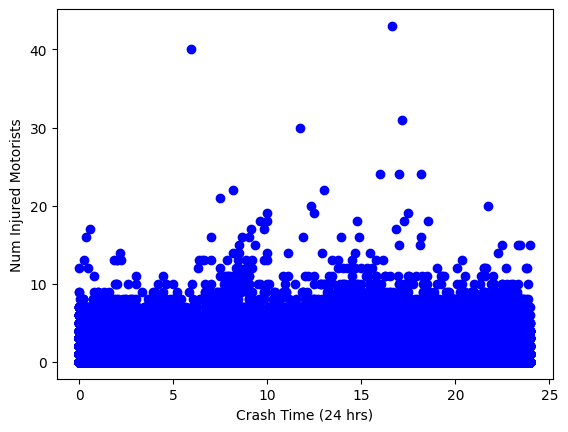

In [4]:
# Now that our data is successfully pre-processed, lets cluster!

X = to_cluster[['CRASH TIME', 'NUMBER OF MOTORIST INJURED']]

plt.scatter(X['CRASH TIME'], X['NUMBER OF MOTORIST INJURED'], c='blue')
plt.xlabel("Crash Time (24 hrs)")
plt.ylabel("Num Injured Motorists")
plt.show()
# this is what things look like before we cluster

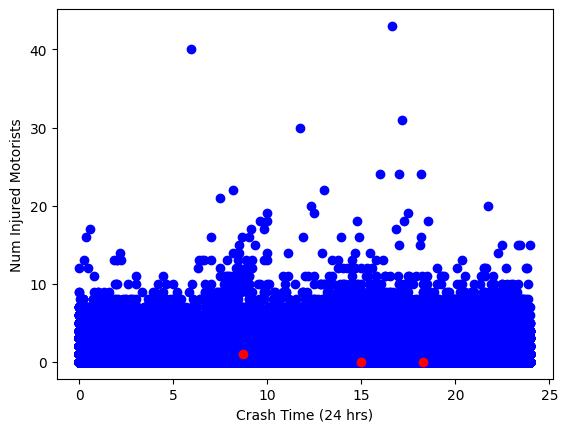

         CRASH TIME  NUMBER OF MOTORIST INJURED
0          2.650000                           2
1         11.750000                           1
2          6.916667                           0
3          9.583333                           0
4          8.216667                           0
...             ...                         ...
1975439    9.033333                           0
1975440   19.266667                           0
1975441   12.500000                           0
1975442    6.000000                           0
1975443    7.816667                           1

[1975444 rows x 2 columns]


In [10]:
k = 3

centroids = (X.sample(n=k))
plt.scatter(X['CRASH TIME'], X['NUMBER OF MOTORIST INJURED'], c="blue")
plt.scatter(centroids["CRASH TIME"], centroids["NUMBER OF MOTORIST INJURED"], c="red")
plt.xlabel("Crash Time (24 hrs)")
plt.ylabel("Num Injured Motorists")
plt.show()
print(X)

In [11]:
print('hey')


hey


In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        print(centers)
        print()
    return centers, labels

In [15]:
centers, labels = find_clusters(X, 3)


KeyError: "None of [Int64Index([673742, 62834, 1637494], dtype='int64')] are in the [columns]"